In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Time Series Project/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Time Series Project/Dataset/calendar.csv
/content/drive/MyDrive/Time Series Project/Dataset/sales_train_evaluation.csv
/content/drive/MyDrive/Time Series Project/Dataset/sample_submission.csv
/content/drive/MyDrive/Time Series Project/Dataset/sales_train_validation.csv
/content/drive/MyDrive/Time Series Project/Dataset/sell_prices.csv


In [ ]:
sell_prices = pd.read_csv('/content/drive/MyDrive/Time Series Project/Dataset/sell_prices.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Time Series Project/Dataset/sample_submission.csv')
calendar = pd.read_csv('/content/drive/MyDrive/Time Series Project/Dataset/calendar.csv')
sales_train_validation = pd.read_csv('/content/drive/MyDrive/Time Series Project/Dataset/sales_train_validation.csv')
sales_train_evaluation = pd.read_csv('/content/drive/MyDrive/Time Series Project/Dataset/sales_train_evaluation.csv')

In [ ]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [ ]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
sales_train_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [ ]:
sales_train_validation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [ ]:
sales_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


##Pre-processing and Exploration of the data.

In [ ]:
numerical_columns = sales_train_validation.select_dtypes(include=['number'])
numerical_columns.groupby(sales_train_validation['store_id']).sum()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,3982,5437,5954,4345,3793,3722,3709,4387,5577,6113
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,4440,5352,5760,3830,3631,3691,3303,4457,5884,6082
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,5337,6936,8271,6068,5683,5235,5018,5623,7419,7721
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2496,2839,3047,2809,2677,2500,2458,2628,2954,3271
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3084,3724,4192,3410,3257,2901,2776,3022,3700,4033
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,3897,4475,4998,3311,3727,3384,3446,3902,4483,4292
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,3819,4261,4519,3147,3938,3315,3380,3691,4083,3957
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,3862,4862,4812,3236,3069,3242,3324,3991,4772,4874
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,6259,5579,5566,4347,4464,4194,4393,4988,5404,5127


In [ ]:
#Aggregate by the store level for now
numerical_columns = sales_train_validation.select_dtypes(include=['number'])
store_level = numerical_columns.groupby(sales_train_validation['store_id']).sum()
store_level['d'] = store_level.index
store_levelt = store_level.transpose()
store_levelt['d'] = store_levelt.index
store_levelt

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,d
d_1,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,d_1
d_2,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,d_2
d_3,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,d_3
d_4,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,d_4
d_5,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,d_5
...,...,...,...,...,...,...,...,...,...,...,...
d_1910,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,d_1910
d_1911,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,d_1911
d_1912,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,d_1912
d_1913,6113,6082,7721,3271,4033,4292,3957,4874,5127,4325,d_1913


In [ ]:
store_level

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,5437,5954,4345,3793,3722,3709,4387,5577,6113,CA_1
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,5352,5760,3830,3631,3691,3303,4457,5884,6082,CA_2
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,6936,8271,6068,5683,5235,5018,5623,7419,7721,CA_3
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2839,3047,2809,2677,2500,2458,2628,2954,3271,CA_4
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3724,4192,3410,3257,2901,2776,3022,3700,4033,TX_1
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,4475,4998,3311,3727,3384,3446,3902,4483,4292,TX_2
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,4261,4519,3147,3938,3315,3380,3691,4083,3957,TX_3
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,4862,4812,3236,3069,3242,3324,3991,4772,4874,WI_1
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,5579,5566,4347,4464,4194,4393,4988,5404,5127,WI_2


In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
store_levelt.merge(calendar, on='d')

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159,...,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,...,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,...,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,...,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
#Merge this with the calendar data set to look at trends
store_level_final = store_levelt.merge(calendar, on='d')
from datetime import datetime
store_level_final['date'] = store_level_final['date'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))
store_level_final

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,2630,1942,3817,1536,1694,2492,1726,2,1175,2132,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,3722,3691,5235,2500,2901,3384,3315,3242,4194,3159,...,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,3709,3303,5018,2458,2776,3446,3380,3324,4393,3226,...,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,4387,4457,5623,2628,3022,3902,3691,3991,4988,3828,...,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,5577,5884,7419,2954,3700,4483,4083,4772,5404,4686,...,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
store_level_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CA_1          1913 non-null   object        
 1   CA_2          1913 non-null   object        
 2   CA_3          1913 non-null   object        
 3   CA_4          1913 non-null   object        
 4   TX_1          1913 non-null   object        
 5   TX_2          1913 non-null   object        
 6   TX_3          1913 non-null   object        
 7   WI_1          1913 non-null   object        
 8   WI_2          1913 non-null   object        
 9   WI_3          1913 non-null   object        
 10  d             1913 non-null   object        
 11  date          1913 non-null   datetime64[ns]
 12  wm_yr_wk      1913 non-null   int64         
 13  weekday       1913 non-null   object        
 14  wday          1913 non-null   int64         
 15  month         1913 non-null   int64   

(array([15006., 15013., 15020., 15027., 15034., 15041., 15048.]),
 [Text(15006.0, 0, '2011-02-01'),
  Text(15013.0, 0, '2011-02-08'),
  Text(15020.0, 0, '2011-02-15'),
  Text(15027.0, 0, '2011-02-22'),
  Text(15034.0, 0, '2011-03-01'),
  Text(15041.0, 0, '2011-03-08'),
  Text(15048.0, 0, '2011-03-15')])

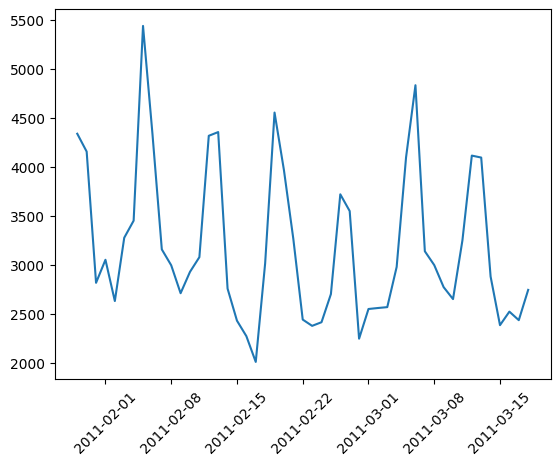

In [ ]:
plt.plot(store_level_final['date'][0:49], store_level_final['CA_1'][0:49])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

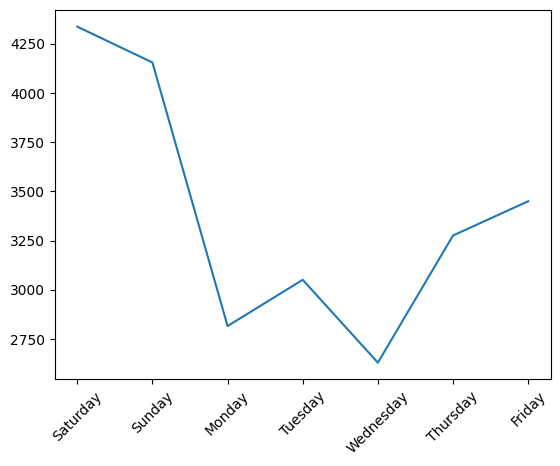

In [ ]:
plt.plot(store_level_final['weekday'][0:7], store_level_final['CA_1'][0:7])
plt.xticks(rotation=45)

####There are clear seasonal trends, particularly within the week. Saturday and Sunday see much higher volumes.

##Choosing the right ARIMA model

In [ ]:
#We check whether this series is stationary.
#Null Hypo = time series is non-stationary
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries[0:100], color='blue',label='Original')
    mean = plt.plot(rolmean[0:100], color='red', label='Rolling Mean')
    std = plt.plot(rolstd[0:100], color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

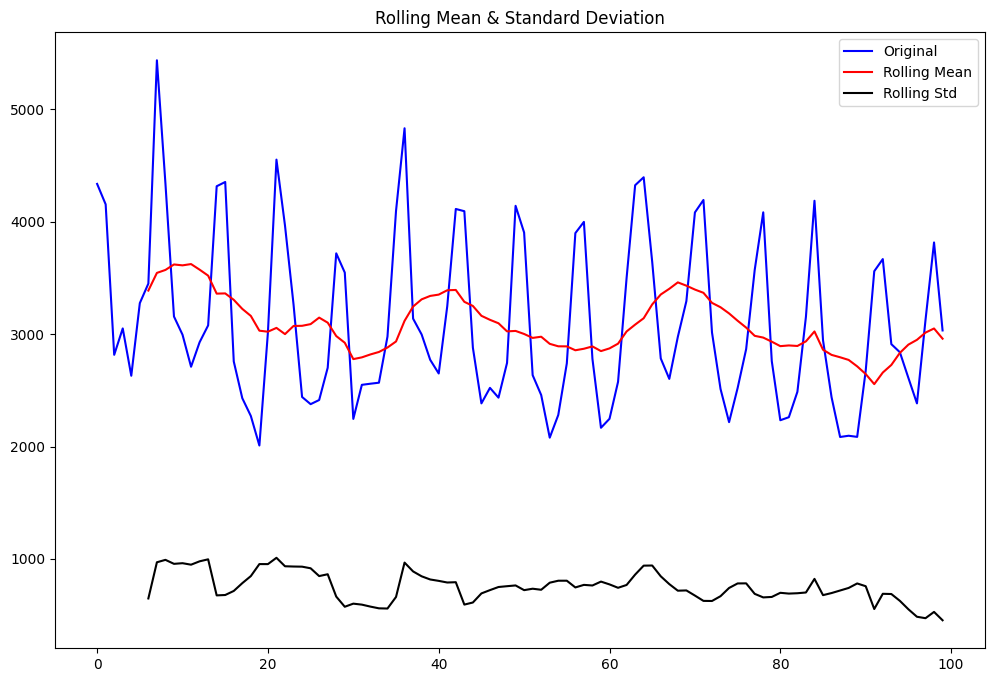

Results of Dickey-Fuller Test:
Test Statistic                 -2.461764
p-value                         0.125057
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [ ]:
test_stationarity(store_level_final['CA_1'][0:100])

Observing the low p value but still higher than 0.05 and negative test statistic but greater than all the critical values at the 1%, 5%, and 10% levels we cannot reject the null hypothesis and conclude that data is stationary
but

We dont need to reject the null hypothesis and it is a good candidate to work with the ARIMA model, as there is peak in weekends so there can be seasonality

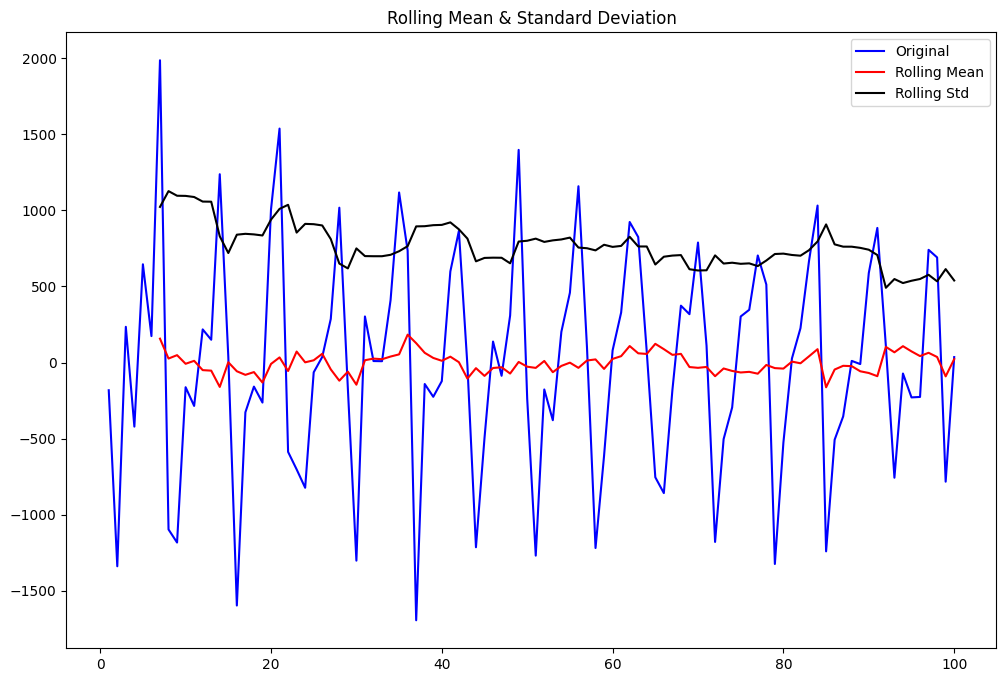

Results of Dickey-Fuller Test:
Test Statistic                  -20.626012
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    1885.000000
Critical Value (1%)              -3.433824
Critical Value (5%)              -2.863075
Critical Value (10%)             -2.567587
dtype: float64


In [ ]:
#We check for difference between prior day now
store_level_final['first_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(1)
test_stationarity(store_level_final['first_difference'].dropna())

###Let us see for Weekly differences¶
####From previous analysis, it is clear that people shop more on the weekend.  if we difference to account for the weekly seasonality

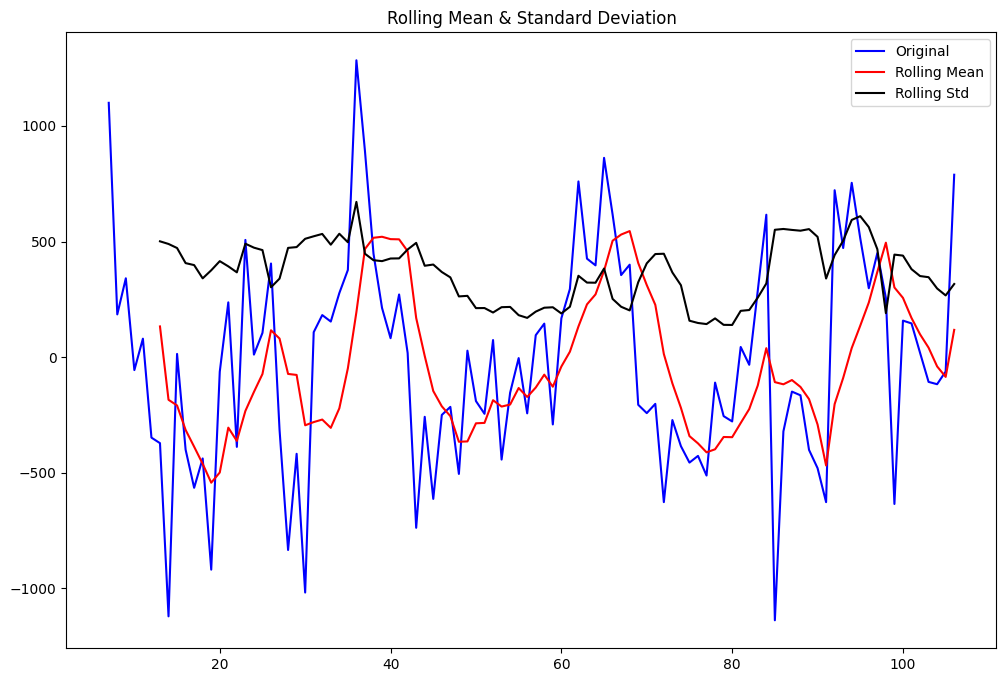

Results of Dickey-Fuller Test:
Test Statistic                  -19.400488
p-value                           0.000000
#Lags Used                       23.000000
Number of Observations Used    1882.000000
Critical Value (1%)              -3.433829
Critical Value (5%)              -2.863077
Critical Value (10%)             -2.567588
dtype: float64


In [ ]:
store_level_final['seasonal_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(7)
test_stationarity(store_level_final['seasonal_difference'].dropna())

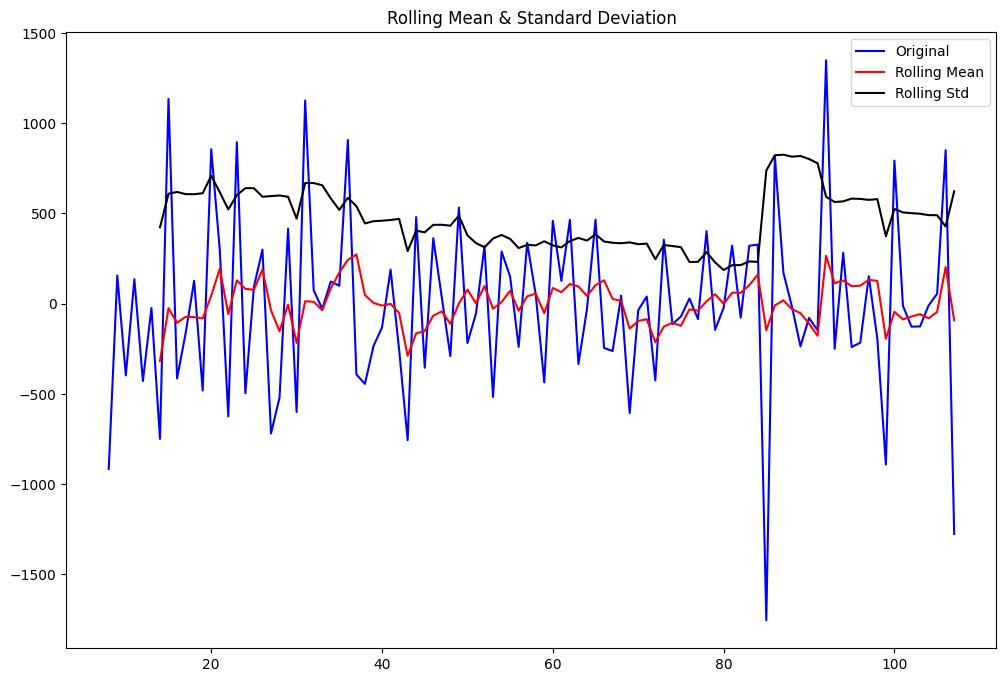

Results of Dickey-Fuller Test:
Test Statistic                  -19.739548
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    1879.000000
Critical Value (1%)              -3.433835
Critical Value (5%)              -2.863079
Critical Value (10%)             -2.567590
dtype: float64


In [ ]:
#Combining both
#  store_level_final['CA_1'].shift(8) for overlapp
store_level_final['seasonal_first_difference'] = store_level_final['CA_1'] - store_level_final['CA_1'].shift(1) - store_level_final['CA_1'].shift(7) + store_level_final['CA_1'].shift(8)
test_stationarity(store_level_final['seasonal_first_difference'].dropna())

In [ ]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

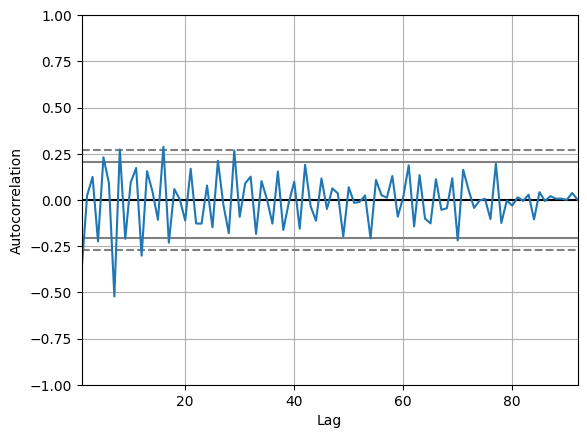

In [ ]:
autocorrelation_plot(store_level_final['seasonal_first_difference'][8:100])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

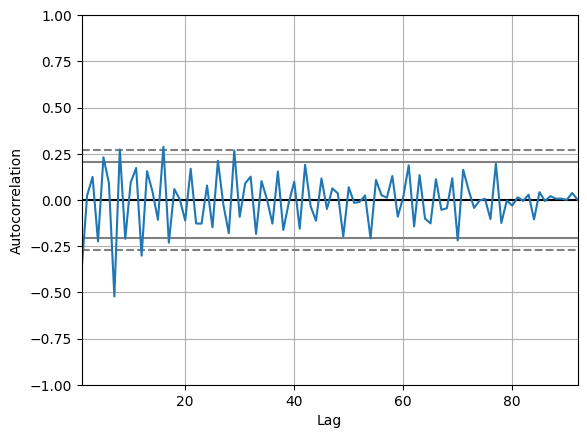

In [ ]:
autocorrelation_plot(store_level_final['seasonal_first_difference'][8:100])

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

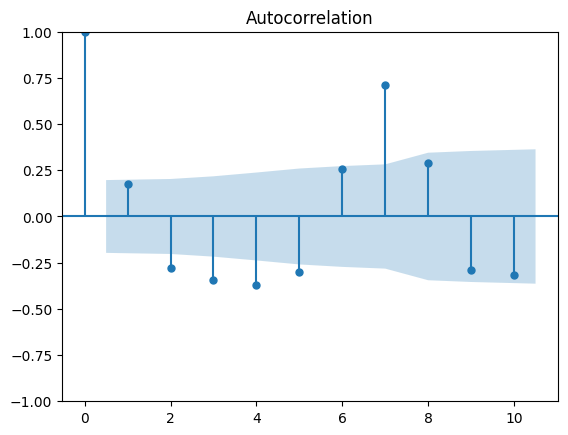

In [ ]:
plot_acf(store_level_final['first_difference'][0:100].dropna(), lags=10);

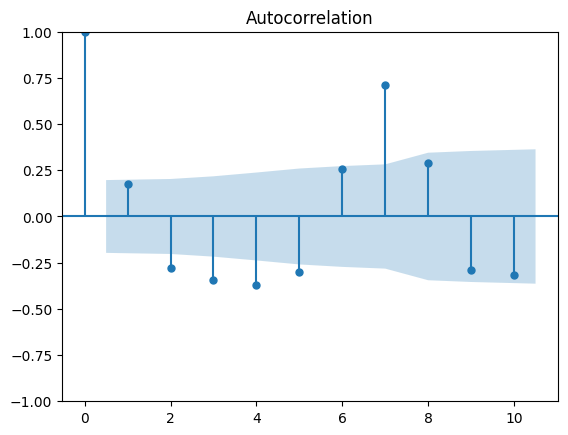

In [ ]:
plot_acf(store_level_final['first_difference'][0:100].dropna(), lags=10);

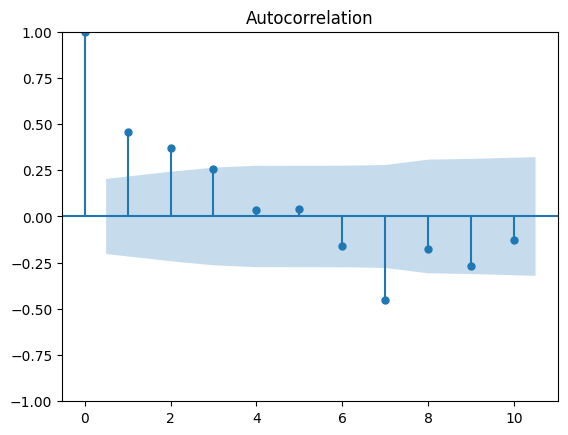

In [ ]:
plot_acf(store_level_final['seasonal_difference'][0:100].dropna(), lags=10);

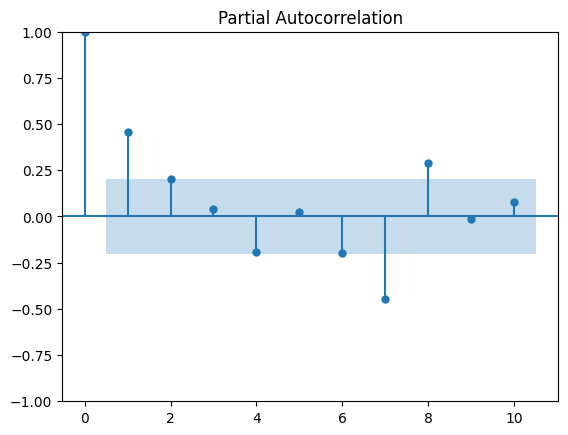

In [ ]:
plot_pacf(store_level_final['seasonal_difference'][0:100].dropna(), lags=10);

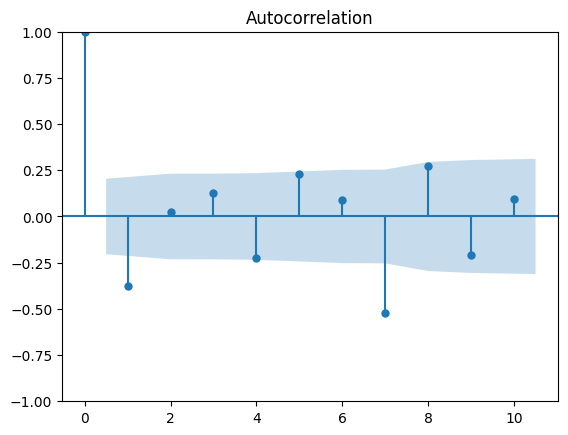

In [ ]:
plot_acf(store_level_final['seasonal_first_difference'][0:100].dropna(), lags=10);

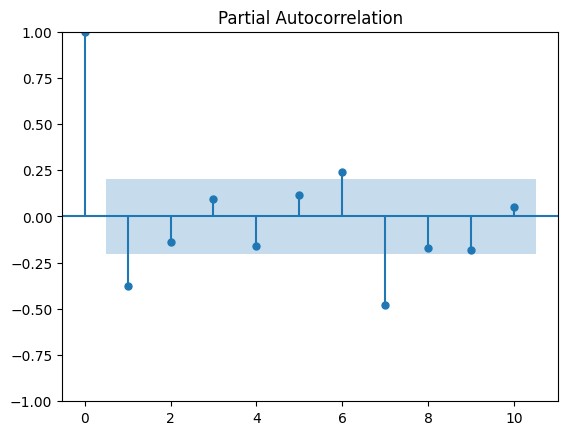

In [ ]:
plot_pacf(store_level_final['seasonal_first_difference'][0:100].dropna(), lags=10);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(store_level_final['first_difference'].dropna())

Based on the spikes at 1 for all the graphs above, we use a ARIMA model of (0, 1, 1)(1, 1, 1)

##Now we implement the model!

In [ ]:
train = np.asarray(store_level_final['first_difference'].dropna()[0:1880].astype(float))
test = np.asarray(store_level_final['first_difference'].dropna()[1880:-1].astype(float))

In [ ]:
print(store_level_final['first_difference'].dropna().dropna()[0:18])
print(store_level_final['first_difference'][18:-1])

1      -182
2     -1339
3       235
4      -421
5       646
6       174
7      1987
8     -1097
9     -1183
10     -162
11     -285
12      218
13      150
14     1238
15       38
16    -1597
17     -327
18     -158
Name: first_difference, dtype: object
18      -158
19      -263
20      1006
21      1538
22      -587
        ... 
1907    -552
1908     -71
1909     -13
1910     678
1911    1190
Name: first_difference, Length: 1894, dtype: object


In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train, order=(0,1,1), seasonal_order=(1,1,1,7))
results=mod.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1880
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -14373.729
Date:                           Tue, 02 Jul 2024   AIC                          28755.457
Time:                                   06:25:33   BIC                          28777.596
Sample:                                        0   HQIC                         28763.613
                                          - 1880                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.082    -12.160      0.000      -1.161      -0.839
ar.S.L7        0.1523      0.019      8.002

In [ ]:
len(train), len(test)

(1880, 31)

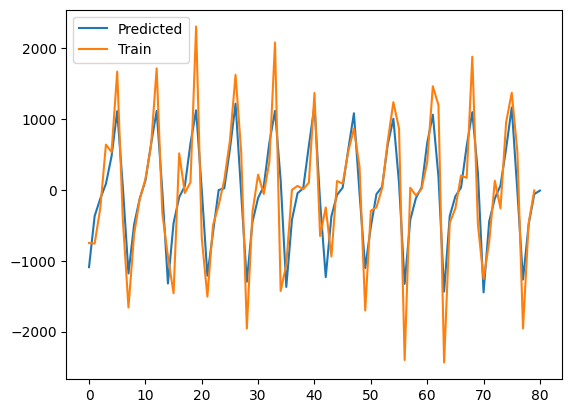

In [ ]:
#Predicting on train data
plt.plot(results.predict(start = 1800, end = 1880), label = 'Predicted')
plt.plot(train[1800:1880], label = 'Train')
plt.legend(loc = "upper left")

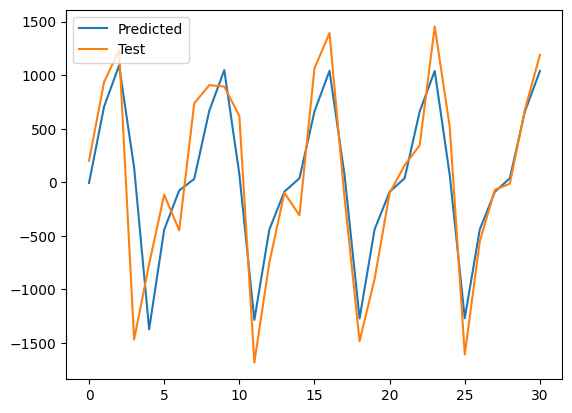

In [ ]:
# Predicting on test data
plt.plot(results.predict(start = len(train), end = len(train)+len(test)-1), label = 'Predicted')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(test,results.predict(start = 1880, end = len(train)+len(test)-1))

187101.43256862223

Taking Small data to train (Just trying)

In [ ]:
train2 = np.asarray(store_level_final['first_difference'][1500:1880].astype(float))
test2 = np.asarray(store_level_final['first_difference'][1880:-1].astype(float))

In [ ]:
import statsmodels.api as sm

mod2 = sm.tsa.statespace.SARIMAX(train2, order=(0,1,1), seasonal_order=(1,1,1,7))
results2=mod2.fit()
print(results2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  380
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2879.207
Date:                           Tue, 02 Jul 2024   AIC                           5766.414
Time:                                   06:25:34   BIC                           5782.089
Sample:                                        0   HQIC                          5772.639
                                           - 380                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.029    -34.327      0.000      -1.057      -0.943
ar.S.L7        0.0932      0.064      1.445

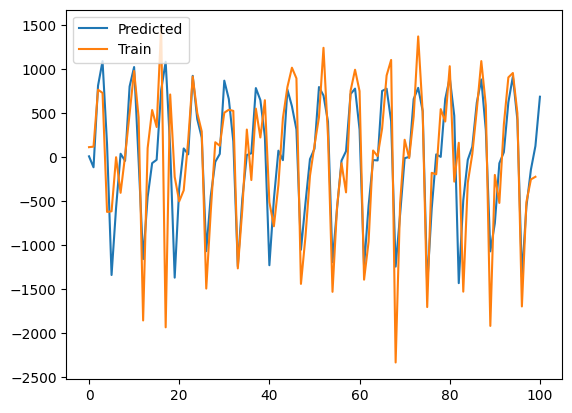

In [ ]:
plt.plot(results2.predict(start = 100, end = 200), label = 'Predicted')
plt.plot(train2[100:200], label = 'Train')
plt.legend(loc = "upper left")

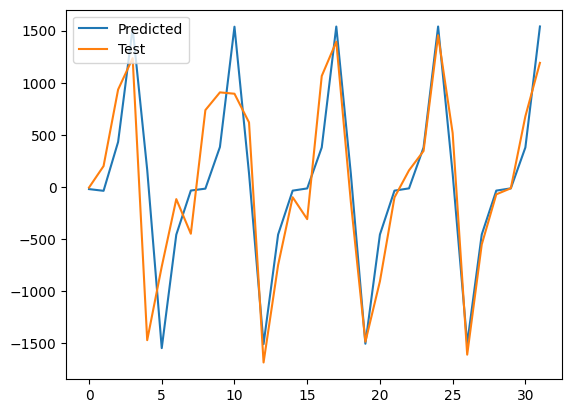

In [ ]:
plt.plot(results2.predict(start = 380, end = 411), label = 'Predicted')
plt.plot(test2, label = 'Test')
plt.legend(loc = "upper left")

In [ ]:
mean_squared_error(test2, results2.predict(start = 380, end = 411))

214327.47166057758

In [ ]:
store_level

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,5437,5954,4345,3793,3722,3709,4387,5577,6113,CA_1
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,5352,5760,3830,3631,3691,3303,4457,5884,6082,CA_2
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,6936,8271,6068,5683,5235,5018,5623,7419,7721,CA_3
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2839,3047,2809,2677,2500,2458,2628,2954,3271,CA_4
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3724,4192,3410,3257,2901,2776,3022,3700,4033,TX_1
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,4475,4998,3311,3727,3384,3446,3902,4483,4292,TX_2
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,4261,4519,3147,3938,3315,3380,3691,4083,3957,TX_3
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,4862,4812,3236,3069,3242,3324,3991,4772,4874,WI_1
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,5579,5566,4347,4464,4194,4393,4988,5404,5127,WI_2


Let's use autoarima to find the best model

In [ ]:
!pip install pmdarima --quiet
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00


In [ ]:
SARIMA_model = pm.auto_arima(train,
                             start_p=1,
                             start_q=1,
                             test='adf',  # Augmented Dickey-Fuller test
                             m=7,  # Weekly seasonality
                             start_P=0,
                             seasonal=True,  # Fit a seasonal model
                             d=None,  # Automatically determine the order of differencing
                             D=1,  # Seasonal differencing order
                             trace=True,  # No output during the search process
                             error_action='ignore',  # Ignore orders that do not work
                             suppress_warnings=True,  # Suppress warnings
                             stepwise=False)

 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=29754.574, Time=0.12 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=3.94 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=16.72 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=29218.640, Time=4.44 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=12.10 sec
 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=24.34 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=29057.360, Time=6.45 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.95 sec
 ARIMA(0,0,0)(2,1,2)[7] intercept   : AIC=inf, Time=23.14 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=29318.077, Time=0.51 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=4.03 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=20.51 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=28785.621, Time=4.05 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=6.61 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=20.49 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=28636.

In [ ]:
train_pred = SARIMA_model.predict_in_sample(start=1, end=-1)
test_pred, confint = SARIMA_model.predict(n_periods=len(test), return_conf_int=True)

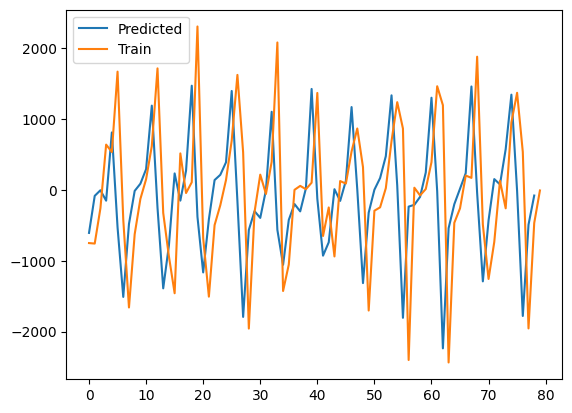

In [ ]:
#Predicting on train data
plt.plot(train_pred[1800:1880], label = 'Predicted')
plt.plot(train[1800:1880], label = 'Train')
plt.legend(loc = "upper left")

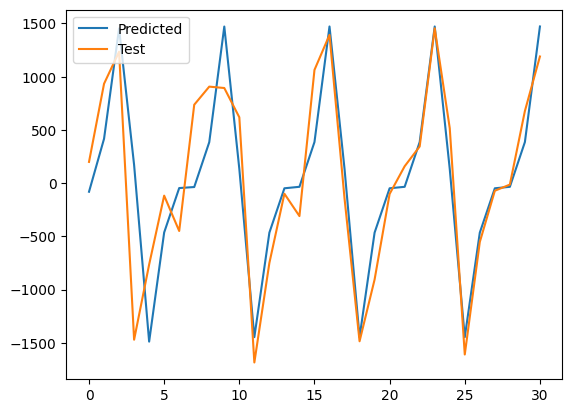

In [ ]:
# Predicting on test data
plt.plot(test_pred, label = 'Predicted')
plt.plot(test, label = 'Test')
plt.legend(loc = 'upper left')

In [ ]:
mean_squared_error(test_pred, test)

215249.8234171326

##Now let's try Category wise projections as there are only 3 categories will predict for each (For Practice)
(before we had store wise)



In [ ]:
numerical_columns = sales_train_validation.select_dtypes(include=['number'])
category_sales = numerical_columns.groupby(sales_train_validation['cat_id']).sum()
category_salest = category_sales.transpose()
category_salest['d'] = category_salest.index
category_salest.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD,d
d_1,23178,3764,5689,d_1
d_2,22758,3357,5634,d_2
d_3,17174,2682,3927,d_3
d_4,18878,2669,3865,d_4
d_5,14603,1814,2729,d_5


In [ ]:
#Merge this with the calendar data set to look at trends
category_level_final = category_salest.merge(calendar, on='d')
category_level_final['date'] = category_level_final['date'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))
category_level_final

,FOODS,HOBBIES,HOUSEHOLD,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,23178,3764,5689,d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,22758,3357,5634,d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,17174,2682,3927,d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,18878,2669,3865,d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,14603,1814,2729,d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,23632,3472,8239,d_1909,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,23317,3353,8363,d_1910,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,26704,4085,9728,d_1911,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,31927,4787,12248,d_1912,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


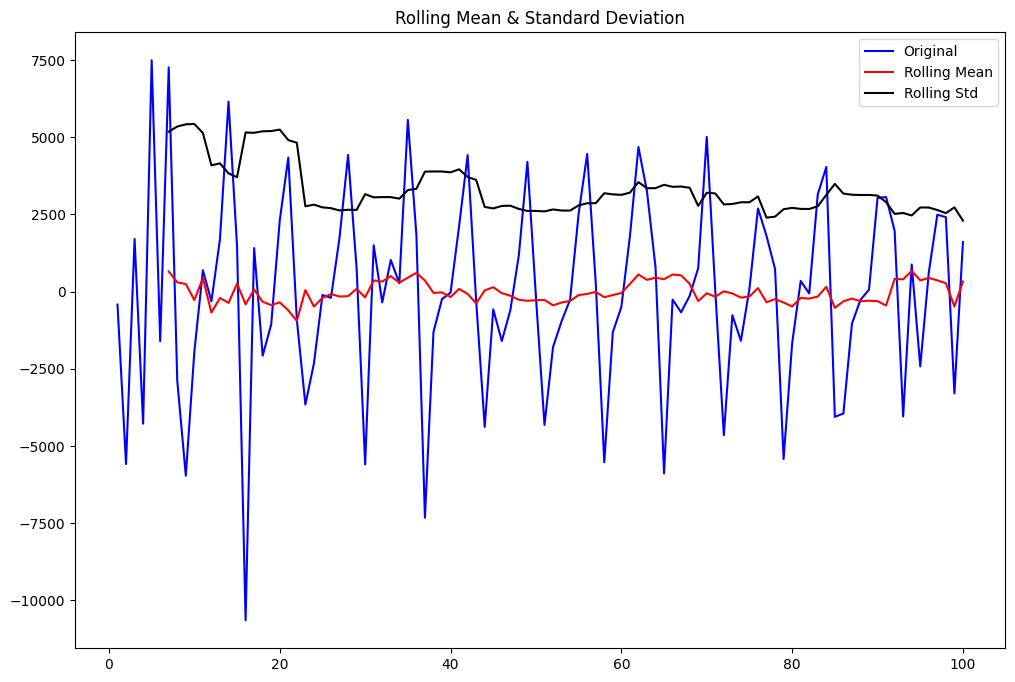

Results of Dickey-Fuller Test:
Test Statistic                  -24.380260
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    1885.000000
Critical Value (1%)              -3.433824
Critical Value (5%)              -2.863075
Critical Value (10%)             -2.567587
dtype: float64


In [ ]:
category_level_final['first_difference_food'] = category_level_final['FOODS'] - category_level_final['FOODS'].shift(1)
test_stationarity(category_level_final['first_difference_food'].dropna())

Text(0.5, 1.0, 'Food: SARIMA Model Prediction vs. Test with RMSE = 4726')

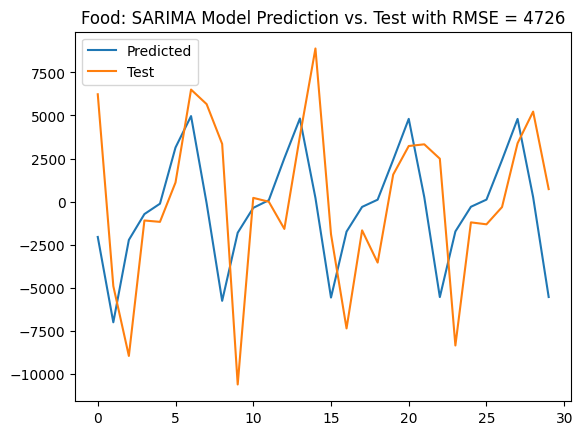

In [ ]:
train_food = np.asarray(category_level_final['first_difference_food'].dropna()[0:1883].astype(float))
test_food = np.asarray(category_level_final['first_difference_food'][1883:].astype(float))
n_test = len(test_food)

# Fit SARIMAX model
mod_food = sm.tsa.statespace.SARIMAX(train_food, order=(1, 0, 1), seasonal_order=(1, 1, 1, 7)) # Chosen by auto-arima
results_food = mod_food.fit()

# Predict
start_pred = len(train_food)  # 1883
end_pred = start_pred + n_test - 1  # 1883 + n_test - 1

# Plotting
plt.plot(results_food.predict(start=start_pred, end=end_pred), label='Predicted')
plt.plot(test_food, label='Test')
plt.legend(loc='upper left')

# Calculate RMSE
predicted_values = results_food.predict(start=start_pred, end=end_pred)
rmse = math.sqrt(mean_squared_error(test_food, predicted_values))
plt.title("Food: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

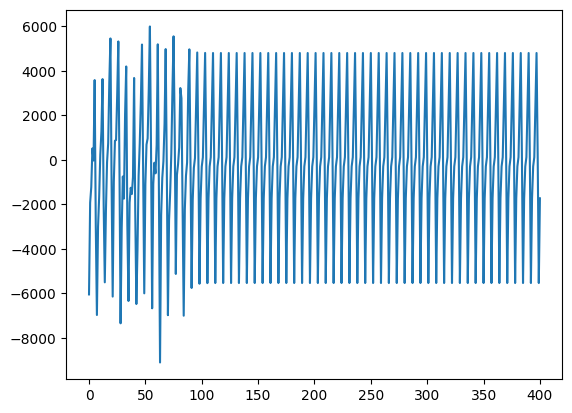

In [ ]:
plt.plot(results_food.predict(start = 1800, end = 2200), label = 'Predicted') # a prediction above the test samples ie till 2200

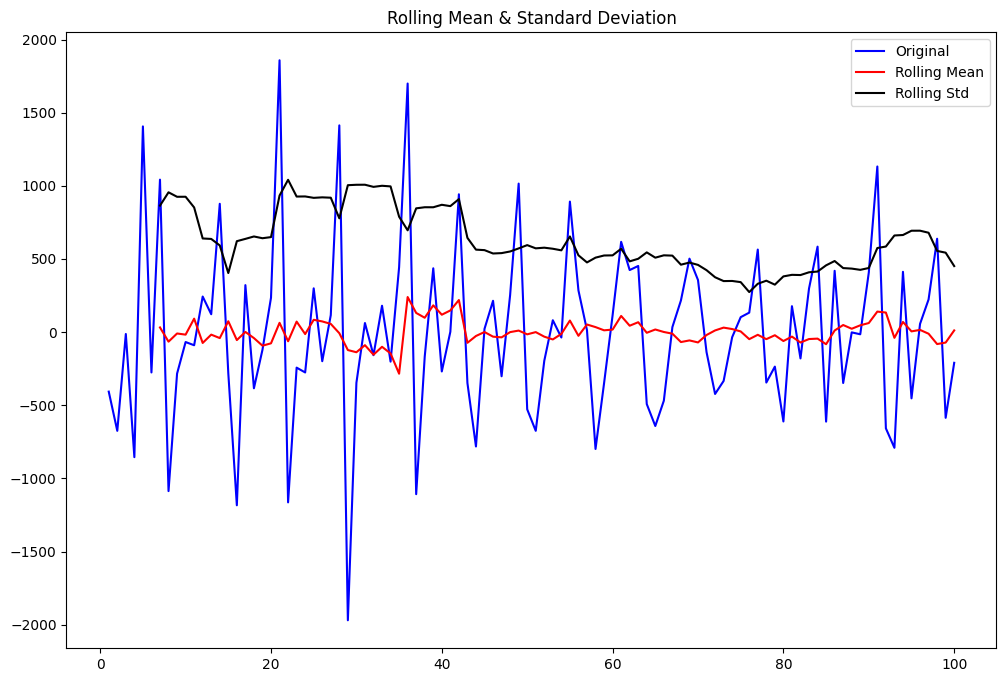

Results of Dickey-Fuller Test:
Test Statistic                -1.441951e+01
p-value                        7.955431e-27
#Lags Used                     2.600000e+01
Number of Observations Used    1.885000e+03
Critical Value (1%)           -3.433824e+00
Critical Value (5%)           -2.863075e+00
Critical Value (10%)          -2.567587e+00
dtype: float64


In [ ]:
category_level_final['first_difference_hobbies'] = category_level_final['HOBBIES'] - category_level_final['HOBBIES'].shift(1)
test_stationarity(category_level_final['first_difference_hobbies'].dropna())

Text(0.5, 1.0, 'hobbies: SARIMA Model Prediction vs. Test with RMSE = 617')

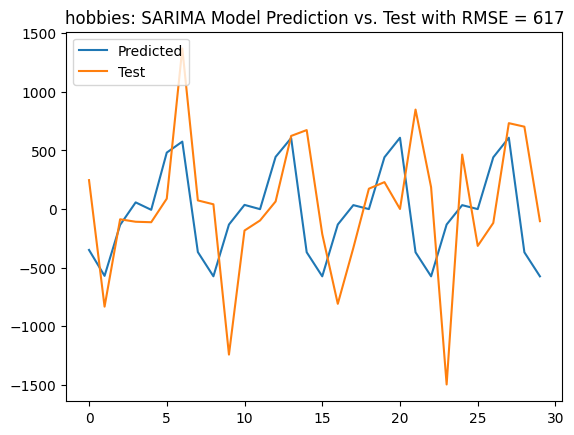

In [ ]:
train_hobbies = np.asarray(category_level_final['first_difference_hobbies'].dropna()[0:1883].astype(float))
test_hobbies = np.asarray(category_level_final['first_difference_hobbies'][1883:].astype(float))
n_test = len(test_hobbies)

# Fit SARIMAX model
mod_hobbies = sm.tsa.statespace.SARIMAX(train_hobbies, order=(1, 0, 1), seasonal_order=(1, 1, 1, 7)) # Chosen by auto-arima
results_hobbies = mod_hobbies.fit()

# Predict
start_pred = len(train_hobbies)  # 1883
end_pred = start_pred + n_test - 1  # 1883 + n_test - 1

# Plotting
plt.plot(results_hobbies.predict(start=start_pred, end=end_pred), label='Predicted')
plt.plot(test_hobbies, label='Test')
plt.legend(loc='upper left')

# Calculate RMSE
predicted_values = results_hobbies.predict(start=start_pred, end=end_pred)
rmse = math.sqrt(mean_squared_error(test_hobbies, predicted_values))
plt.title("hobbies: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

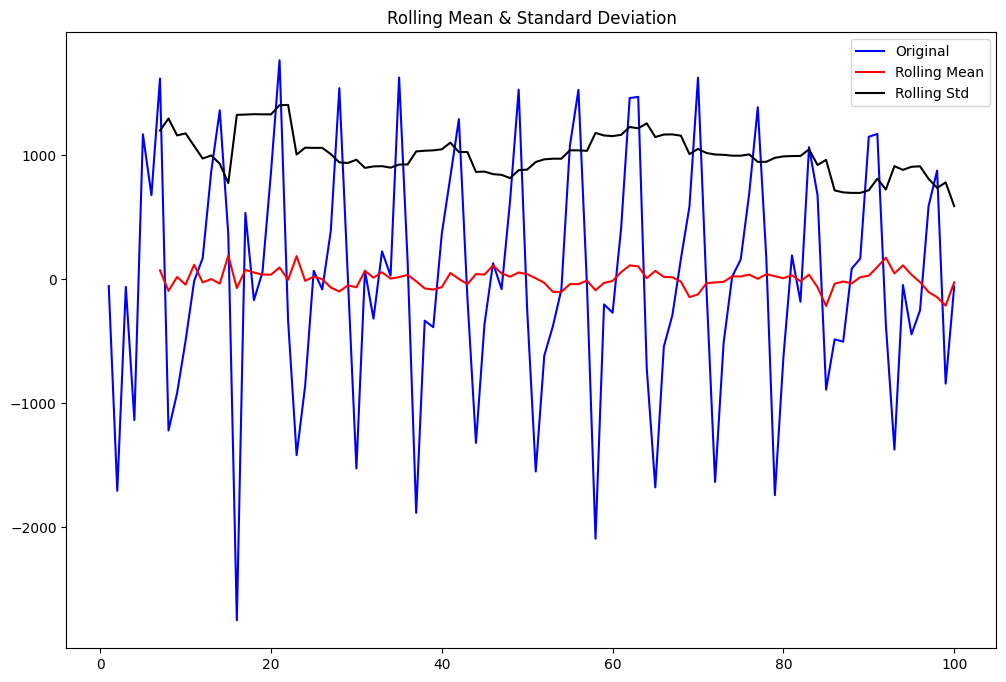

Results of Dickey-Fuller Test:
Test Statistic                -1.354790e+01
p-value                        2.441267e-25
#Lags Used                     2.600000e+01
Number of Observations Used    1.885000e+03
Critical Value (1%)           -3.433824e+00
Critical Value (5%)           -2.863075e+00
Critical Value (10%)          -2.567587e+00
dtype: float64


In [ ]:
category_level_final['first_difference_household'] = category_level_final['HOUSEHOLD'] - category_level_final['HOUSEHOLD'].shift(1)
test_stationarity(category_level_final['first_difference_household'].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'household: SARIMA Model Prediction vs. Test with RMSE = 801')

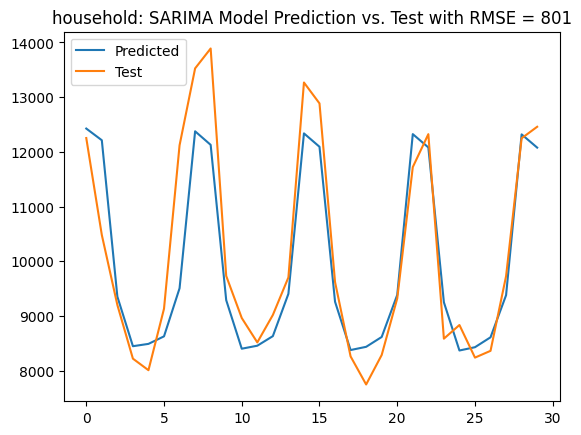

In [ ]:
train_household = np.asarray(category_level_final['HOUSEHOLD'][0:1883].astype(float))
test_household = np.asarray(category_level_final['HOUSEHOLD'][1883:].astype(float))
n_test = len(test_household)

# Fit SARIMAX model
mod_household = sm.tsa.statespace.SARIMAX(train_household, order=(1, 0, 1), seasonal_order=(1, 1, 1, 7)) # Chosen by auto-arima
results_household = mod_household.fit()

# Predict
start_pred = len(train_household)  # 1883
end_pred = start_pred + n_test - 1  # 1883 + n_test - 1

# Plotting
plt.plot(results_household.predict(start=start_pred, end=end_pred), label='Predicted')
plt.plot(test_household, label='Test')
plt.legend(loc='upper left')

# Calculate RMSE
predicted_values = results_household.predict(start=start_pred, end=end_pred)
rmse = math.sqrt(mean_squared_error(test_household, predicted_values))
plt.title("household: SARIMA Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

##Exponential Smoothening

Let's go back with stores prediction (only for first store)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
train = np.asarray(store_level_final['first_difference'].dropna()[0:1880].astype(float))
test = np.asarray(store_level_final['first_difference'].dropna()[1880:-1].astype(float))

In [ ]:
len(train), len(test)

(1880, 31)

In [ ]:
model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
fit_hw = model_hw.fit()
print(fit_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1880
Model:             ExponentialSmoothing   SSE                      530380095.887
Optimized:                         True   AIC                          23616.146
Trend:                         Additive   BIC                          23677.075
Seasonal:                      Additive   AICC                         23616.341
Seasonal Periods:                     7   Date:                 Tue, 02 Jul 2024
Box-Cox:                          False   Time:                         07:07:06
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0403571                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


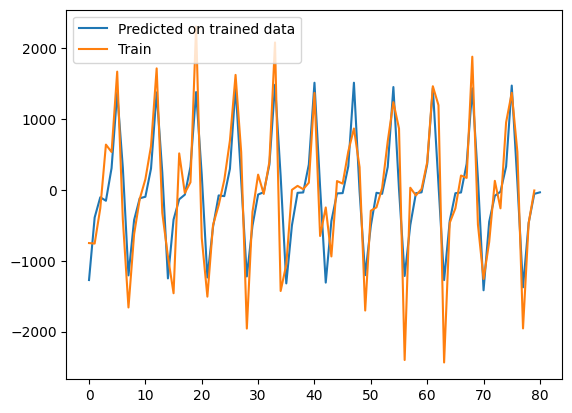

In [ ]:
plt.plot(fit_hw.predict(start = 1800, end = 1880), label = 'Predicted on trained data')
plt.plot(train[1800:1880], label = 'Train')
plt.legend(loc = "upper left")

In [ ]:
1880+len(test)-1

1910

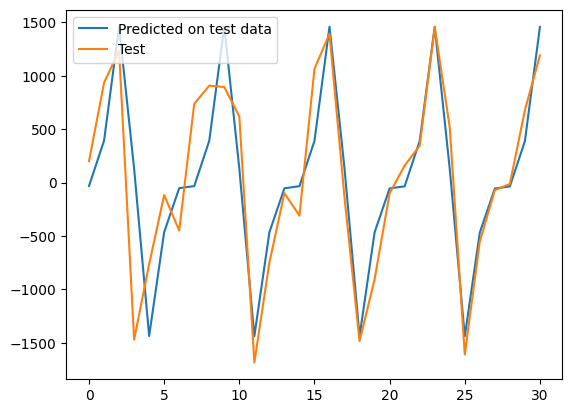

In [ ]:
plt.plot(fit_hw.predict(start = 1880, end = 1910), label = 'Predicted on test data')
plt.plot(test, label = 'Test')
plt.legend(loc = "upper left")

In [ ]:
rmse = math.sqrt(mean_squared_error(fit_hw.predict(start = 1880, end = 1910), test))
rmse

455.8609428454517

##Let's do for category (for all three category) for Practice

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Food: Exponential Smoothing Model Prediction vs. Test with RMSE = 4627')

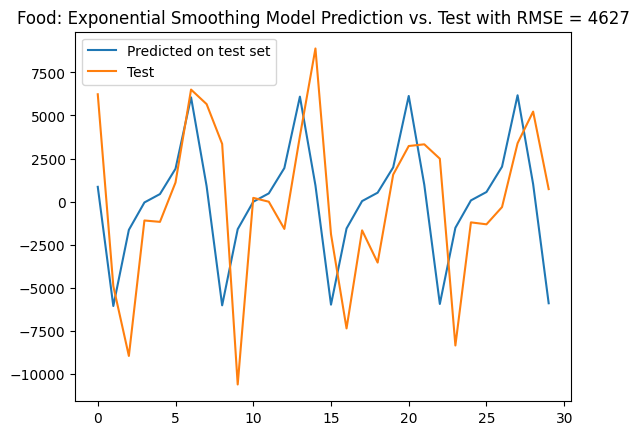

In [ ]:
train_food = np.asarray(category_level_final['first_difference_food'].dropna()[0:1883].astype(float))
test_food = np.asarray(category_level_final['first_difference_food'][1883:].astype(float))
n_test = len(test_food)

# Fit ExponentialSmoothing model
model_hw_food = ExponentialSmoothing(train_food, trend='add', seasonal='add', seasonal_periods=7)
fit_hw_food = model_hw_food.fit()

# Predict
start_pred = len(train_food)  # 1883
end_pred = start_pred + n_test - 1  # 1883 + n_test - 1

# Plotting
plt.plot(fit_hw_food.predict(start=start_pred, end=end_pred), label='Predicted on test set')
plt.plot(test_food, label='Test')
plt.legend(loc='upper left')

# Calculate RMSE
predicted_values = fit_hw_food.predict(start=start_pred, end=end_pred)
rmse = math.sqrt(mean_squared_error(test_food, predicted_values))
plt.title("Food: Exponential Smoothing Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Hobbies: Exponential Smoothing Model Prediction vs. Test with RMSE = 649')

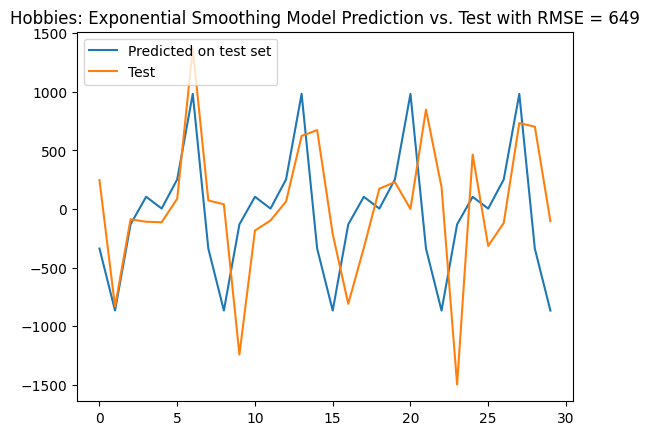

In [ ]:
train_hobbies = np.asarray(category_level_final['first_difference_hobbies'].dropna()[0:1883].astype(float))
test_hobbies = np.asarray(category_level_final['first_difference_hobbies'][1883:].astype(float))
n_test = len(test_hobbies)

# Fit ExponentialSmoothing model
model_hw_hobbies = ExponentialSmoothing(train_hobbies, trend='add', seasonal='add', seasonal_periods=7)
fit_hw_hobbies = model_hw_hobbies.fit()

# Predict
start_pred = len(train_hobbies)  # 1883
end_pred = start_pred + n_test - 1  # 1883 + n_test - 1

# Plotting
plt.plot(fit_hw_hobbies.predict(start=start_pred, end=end_pred), label='Predicted on test set')
plt.plot(test_hobbies, label='Test')
plt.legend(loc='upper left')

# Calculate RMSE
predicted_values = fit_hw_hobbies.predict(start=start_pred, end=end_pred)
rmse = math.sqrt(mean_squared_error(test_hobbies, predicted_values))
plt.title("Hobbies: Exponential Smoothing Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Household: Exponential Smoothing Model Prediction vs. Test with RMSE = 1960')

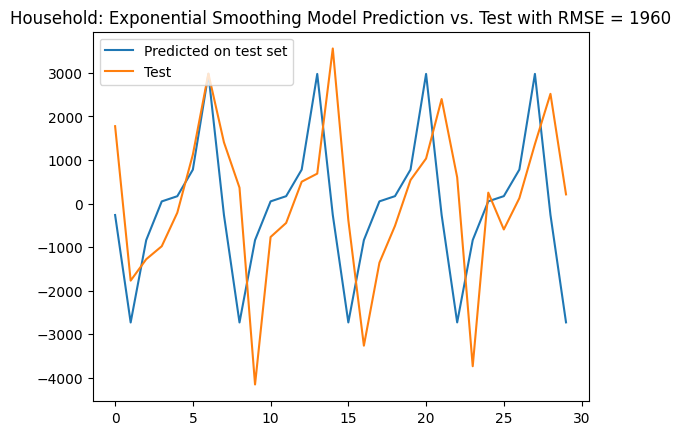

In [ ]:
train_household = np.asarray(category_level_final['first_difference_household'].dropna()[0:1883].astype(float))
test_household = np.asarray(category_level_final['first_difference_household'][1883:].astype(float))
n_test = len(test_hobbies)

# Fit ExponentialSmoothing model
model_hw_household = ExponentialSmoothing(train_household, trend='add', seasonal='add', seasonal_periods=7)
fit_hw_household = model_hw_household.fit()

# Predict
start_pred = len(train_household)  # 1883
end_pred = start_pred + n_test - 1  # 1883 + n_test - 1

# Plotting
plt.plot(fit_hw_household.predict(start=start_pred, end=end_pred), label='Predicted on test set')
plt.plot(test_household, label='Test')
plt.legend(loc='upper left')

# Calculate RMSE
predicted_values = fit_hw_household.predict(start=start_pred, end=end_pred)
rmse = math.sqrt(mean_squared_error(test_household, predicted_values))
plt.title("Household: Exponential Smoothing Model Prediction vs. Test with RMSE = " + "{:.0f}".format(rmse))

I calculated MAE for sarima model by mistake so calculating RMSE as other models are in that metric

In [1]:
import math

In [3]:
rmse_sarima_wd = math.sqrt(181901.68869775155)
rmse_sarima_wd

426.49934196637577

In [6]:
rmse_sarima_ad = math.sqrt(215249.8234171326)
rmse_sarima_ad

463.95023808284935

#Store Wise Prediction Results (For store only CA1) (RMSE) (Without Differencing Columns)

SARIMA: 426.49934196637577

Exponential Smoothing: 400.3475752176327

#Store Wise Prediction Results (For store only CA1) (RMSE) (After Differencing Columns)

SARIMA: 463.95023808284935

Exponential Smoothing: 455.8609428454517

Lost the code where i trained on data without differencing as i made changes to that code for predicting on differnced data but i recoreded the accuracy